In [1]:
import pandas as pd
import plotly.express as px

from scipy import stats
import statsmodels.stats.multicomp as mc

In [2]:
labels={
    'sin':'Sin OpenMP',
    'con':'Con OpenMP',
    'numpy':'Numpy',
    'Reficiente':'R-eficiente',
    'R':'Software-R',
    'experiment':'Tamaño de la matriz',
    'Valor':'Tiempo en segundos'
}

In [3]:
df = pd.read_csv('../data/experimento2.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
df = df.melt(id_vars=['experiment'], 
             value_vars=['sin', 'con', 'numpy', 'Reficiente', 'R'],
             var_name='Variable', 
             value_name='Valor')
df.head()

,experiment,Variable,Valor
0,100,sin,0.004681
1,100,sin,0.005083
2,100,sin,0.004823
3,100,sin,0.005338
4,100,sin,0.004457


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   experiment  750 non-null    int64  
 1   Variable    750 non-null    object 
 2   Valor       750 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.7+ KB


In [5]:
df2 = df.copy()
df2 = df2.groupby(['experiment','Variable'])['Valor'].mean().reset_index()
df2.head()

,experiment,Variable,Valor
0,100,R,0.220546
1,100,Reficiente,0.002029
2,100,con,0.003383
3,100,numpy,0.001005
4,100,sin,0.004785


In [6]:
fig = px.line(df2, x="experiment", y="Valor", color='Variable', markers=True, title='', labels=labels)
# fig.write_html('fxf.html'.format(fig))
fig.show()

In [7]:
fig = px.box(df, x="experiment", y="Valor", color='Variable', labels=labels)
fig.show()

In [8]:
df = pd.read_csv('../data/experimento2.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
df = df.melt(id_vars=['experiment'], 
             value_vars=['sin', 'con', 'numpy'],
             var_name='Variable', 
             value_name='Valor')
df.head()

,experiment,Variable,Valor
0,100,sin,0.004681
1,100,sin,0.005083
2,100,sin,0.004823
3,100,sin,0.005338
4,100,sin,0.004457


In [9]:
comp = mc.MultiComparison(df['Valor'], df['experiment'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
100,200,0.0213,0.4669,-0.0141,0.0567,False
100,300,0.0681,0.0,0.0327,0.1035,True
100,400,0.1905,0.0,0.1551,0.226,True
100,500,0.3204,0.0,0.285,0.3558,True
200,300,0.0468,0.0031,0.0113,0.0822,True
200,400,0.1692,0.0,0.1338,0.2046,True
200,500,0.2991,0.0,0.2637,0.3345,True
300,400,0.1225,0.0,0.0871,0.1579,True
300,500,0.2523,0.0,0.2169,0.2877,True
400,500,0.1299,0.0,0.0944,0.1653,True


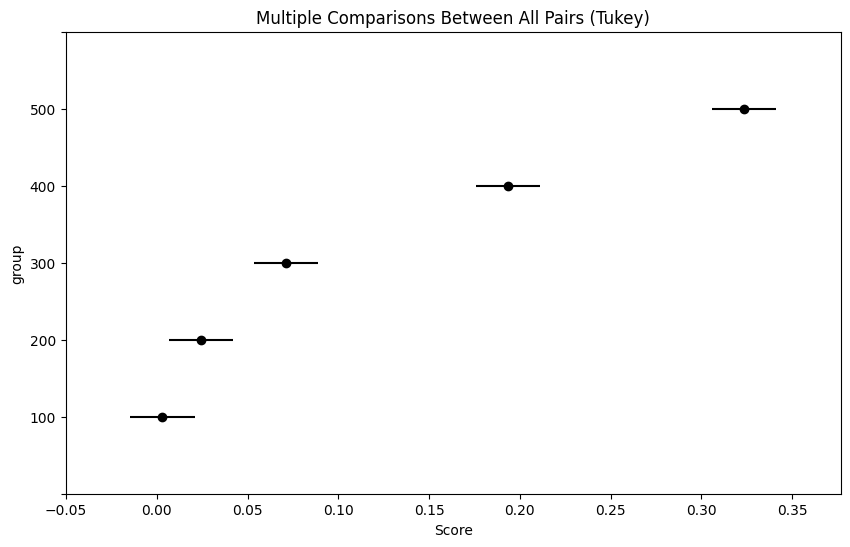

In [10]:
post_hoc_res.plot_simultaneous(ylabel='group', xlabel='Score');